In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import shap

In [5]:
#ładowanie zbioru danych
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [6]:
#wyniki
pca_df = pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
pca_df['target'] = y

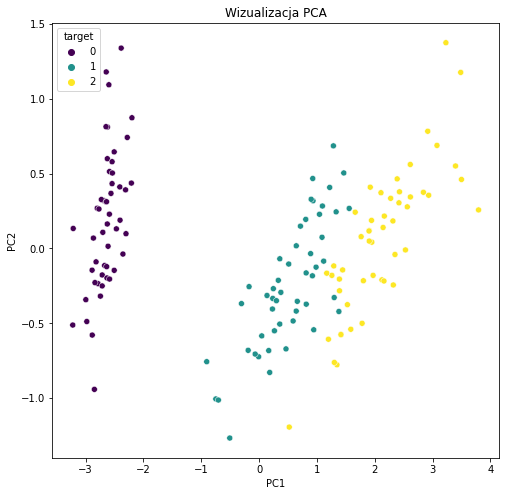

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='PC1',y='PC2',hue='target',data=pca_df, palette='viridis')
plt.title("Wizualizacja PCA")
plt.show()

WARTOŚCI WŁASNE I WAGI KOMPONENTÓW - jakie cechy wpłynęły na dany komponent PC1, PC2

In [8]:
#wartości własne
expalained_varince = pca.explained_variance_ratio_
print(f"Tłumaczona wariancja przez PC: {expalained_varince}")

Tłumaczona wariancja przez PC: [0.92461872 0.05306648]


In [9]:
#Wagi zmiennych w komponentach
components = pd.DataFrame(pca.components_,columns=feature_names,index=['PC1','PC2'])
print(f"wagi zmiennych w komponentach:\n{components}")

wagi zmiennych w komponentach:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.361387         -0.084523           0.856671          0.358289
PC2           0.656589          0.730161          -0.173373         -0.075481


In [13]:
expalainer = shap.DeepExplainer(pca.transform,X)
shap_values = expalainer(X)

# shap.summary_plot(shap_values,feature_names=feature_names)
# shap.dependence_plot(0,shap_values.values[:,:,0],X)
shap.plots.bar(shap_values)

ValueError: ValueError: <class 'method'> is not currently a supported model type!